In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

In [ ]:
data = datasets.fetch_openml(
                    'mnist_784', 
                    version=1,
                    return_X_y=True
)
pixel_values, targets = data
targets = targets.astype(int)

In [ ]:
pixel_values = pixel_values.to_numpy()

In [ ]:
single_image = pixel_values[1, :].reshape(28, 28)

In [ ]:
plt.imshow(single_image, cmap = "gray")

In [ ]:
tsne = manifold.TSNE(n_components=2, random_state=42)

transformed_data = tsne.fit_transform(pixel_values[:3000, :])

In [ ]:
tsne_df = pd.DataFrame(
        np.column_stack((transformed_data, targets[:3000])),
        columns=["x", "y", "targets"]
        )

In [ ]:
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

In [ ]:
tsne_df

In [ ]:
grid = sns.FacetGrid(tsne_df, hue="targets", size=8)
grid.map(plt.scatter, "x", "y").add_legend()

# Cross validation

In [25]:
df = pd.read_csv("winequality-red.csv")

In [26]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [27]:
# a mapping dictionary that maps the quality values from o to 5
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

In [28]:
df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [29]:
# shuffle the data frame and reset index
df = df.sample(frac=1).reset_index(drop = True)

In [30]:
# Top 1000 rows are selected
# for training
df_train = df.head(1000)

In [31]:
#bottom 599 values are selected
# for testing/validation
df_test = df.tail(599)

In [32]:
# Let's start with the decision tree algo
from sklearn import tree
from sklearn import metrics

In [33]:
clf = tree.DecisionTreeClassifier(max_depth = 3)

In [34]:
# Choose the columns you want to train on
# these are the feature for the model
cols = ['fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol'
        ]

In [35]:
# train the model on the provided the features
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [36]:
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])

# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])

# Calculate the accuracy of the predictions on
# training data set
training_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
)

# Calculate the accuracy of the predictions on
# test data set
test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
)

In [37]:
test_accuracy

0.5509181969949917

In [38]:
import matplotlib
matplotlib.rc('xtick', labelsize = 20)
matplotlib.rc('ytick', labelsize = 20)

In [39]:
%matplotlib inline

In [40]:
# initialize list to store accuracies
# for training and test data
# we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]

In [41]:
for depth in range(1, 25):
    # init  the model
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf.fit(df_train[cols], df_train.quality)
    # fit the model on given features
    train_predictions =clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    
    # calculate training & test accuracies
    train_accuracy = metrics.accuracy_score(
        df_train.quality, train_predictions 
    )
    
    test_accuracy = metrics.accuracy_score(
        df_test.quality, test_predictions 
    )
    
    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy) 

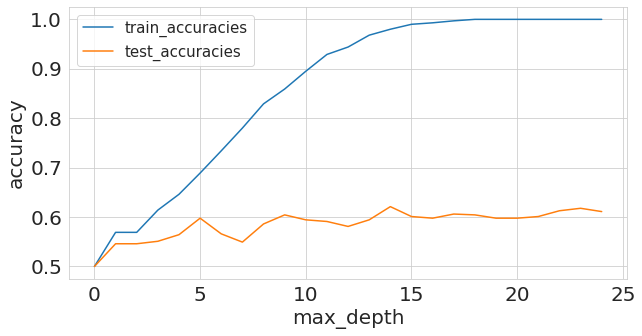

In [42]:
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label = "train_accuracies")
plt.plot(test_accuracies, label = "test_accuracies")
plt.legend(loc="upper left",prop = {'size':15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size = 20)
plt.ylabel("accuracy", size = 20)
plt.show()